# Data Manipulation

## Reading the data

In [1]:
import pandas as pd

# Read the .dat file
df = pd.read_csv('ratings.dat', sep='::', engine='python', names=['user_id', 'movie_id', 'rating', 'rating_timestamp'])

# Save to CSV
df.to_csv('ratings_twitter.csv', index=False)

In [2]:
ratings = pd.read_csv('ratings_twitter.csv')
ratings

,user_id,movie_id,rating,rating_timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524
...,...,...,...,...
906826,70781,9893250,10,1613857551
906827,70781,9898858,3,1585958452
906828,70782,172495,10,1587107015
906829,70782,414387,10,1587107852


In [3]:
# Read the .dat file
df = pd.read_csv('movies.dat', sep='::', engine='python', names=['movie_id', 'movie_title (movie_year)', 'genre'])

# Save to CSV
df.to_csv('movies_twitter.csv', index=False)

In [4]:
movies = pd.read_csv('movies_twitter.csv')
movies

,movie_id,movie_title (movie_year),genre
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror
...,...,...,...
37337,14499632,22 vs. Earth (2021),Animation|Short|Adventure
37338,14527836,Recalled (2021),Drama|Mystery|Thriller
37339,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music
37340,14735160,Mum is Pregnant (2021),NaN


## Merging both the movies and ratings csv

In [5]:
movie_ratings = pd.merge(movies, ratings, on='movie_id',how='left')
movie_ratings.to_csv('merged_movieratings.csv')

In [6]:
movie_ratings = pd.read_csv("merged_movieratings.csv")
movie_ratings.user_id.nunique(dropna = True)

70783

In [7]:
movie_ratings.movie_id.nunique(dropna = True)

37337

In [8]:
movie_ratings.genre.nunique(dropna = True)

2805

In [9]:
movie_ratings

,Unnamed: 0,movie_id,movie_title (movie_year),genre,user_id,rating,rating_timestamp
0,0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short,42898,5,1396981211
1,1,10,La sortie des usines Lumière (1895),Documentary|Short,70577,10,1412878553
2,2,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579
3,3,25,The Oxford and Cambridge University Boat Race ...,NaN,37628,8,1488189899
4,4,91,Le manoir du diable (1896),Short|Horror,5814,6,1385233195
...,...,...,...,...,...,...,...
908629,908629,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,55241,10,1622416491
908630,908630,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,57060,10,1623092790
908631,908631,14544192,Bo Burnham: Inside (2021),Comedy|Drama|Music,68109,3,1622844954
908632,908632,14735160,Mum is Pregnant (2021),NaN,19702,9,1622798273


### Finding number of movies per genre

In [10]:
# Load dataset
df = movie_ratings

# Count number of movies in each genre
genre_counts = df['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
genre_counts

,genre,count
0,Drama,44596
1,Action|Adventure|Sci-Fi,36451
2,Comedy|Drama,25347
3,Drama|Romance,24279
4,Crime|Drama|Thriller,22663
...,...,...
2800,Action|Fantasy|Adventure,1
2801,Animation|Action|Adventure|Comedy|Drama|Fantasy,1
2802,Drama|Mystery|Music,1
2803,Adventure|Comedy|Action,1


## Selecting top 100 genres and users

In [11]:
# Select top 100 genres with highest number of movies
top_100_genres = genre_counts.head(100)
# If you want just a list of the top 500 movie IDs
top_100_genres_name = top_100_genres['genre'].tolist()
# Displaying the top 1000 movie IDs
top_100_genres_name

['Drama',
 'Action|Adventure|Sci-Fi',
 'Comedy|Drama',
 'Drama|Romance',
 'Crime|Drama|Thriller',
 'Comedy',
 'Comedy|Drama|Romance',
 'Crime|Drama',
 'Action|Adventure|Sci-Fi|Thriller',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Action|Crime|Thriller',
 'Crime|Drama|Mystery|Thriller',
 'Horror|Mystery|Thriller',
 'Biography|Drama',
 'Drama|Thriller',
 'Horror|Thriller',
 'Comedy|Romance',
 'Action|Thriller',
 'Action|Crime|Drama|Thriller',
 'Action|Adventure|Comedy|Sci-Fi',
 'Action|Adventure|Thriller',
 'Drama|War',
 'Drama|Mystery|Thriller',
 'Biography|Drama|History',
 'Biography|Crime|Drama',
 'Comedy|Crime',
 'Action|Comedy|Crime',
 'Drama|Mystery|Sci-Fi|Thriller',
 'Animation|Adventure|Comedy|Family|Fantasy',
 'Action|Drama|Thriller',
 'Horror',
 'Drama|Sci-Fi|Thriller',
 'Documentary',
 'Action|Adventure|Fantasy',
 'Crime|Mystery|Thriller',
 'Action|Sci-Fi|Thriller',
 'Drama|Sport',
 'Adventure|Family|Fantasy',
 'Action|Drama|Sci-Fi|Thriller',
 'Adventure|Drama|Sci-Fi',
 'Biography|

In [12]:
# Filter dataframe based on selected genres
new_df = df[df['genre'].isin(top_100_genres_name)]
new_df

,Unnamed: 0,movie_id,movie_title (movie_year),genre,user_id,rating,rating_timestamp
46,46,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama,17575,6,1362810972
57,57,4457,The Patchwork Girl of Oz (1914),Adventure|Family|Fantasy,34238,6,1462147409
63,63,4972,The Birth of a Nation (1915),Drama|History|War,5009,9,1478981499
64,64,4972,The Birth of a Nation (1915),Drama|History|War,10746,8,1376915771
65,65,4972,The Birth of a Nation (1915),Drama|History|War,67760,6,1424450283
...,...,...,...,...,...,...,...
908610,908610,14372240,The Year Earth Changed (2021),Documentary,66168,10,1619300691
908615,908615,14450630,What Drives Us (2021),Documentary,49757,6,1620858694
908616,908616,14450630,What Drives Us (2021),Documentary,57712,10,1619834513
908618,908618,14527836,Recalled (2021),Drama|Mystery|Thriller,68570,9,1622203445


In [13]:
new_df.user_id.nunique(dropna = True)

62239

In [14]:
new_df.genre.nunique(dropna = True)

100

In [15]:
new_df['movie_id'].nunique()

22519

In [16]:
user_unique = new_df['user_id'].unique()
user_unique

array([17575, 34238,  5009, ..., 34552, 22493, 30148], dtype=int64)

In [17]:
user_unique = new_df['user_id'].unique()
# Select top 100 users with highest number of movies
# Group by 'user_id', count the ratings, and sort in descending order
top_users = new_df.groupby('user_id')['rating'].count().sort_values(ascending=False).head(100)

# Get the list of top 100 user IDs
top_100_users = top_users.index.tolist()

# Filter dataframe based on selected genres
new_new_df = new_df[new_df['user_id'].isin(top_100_users)]
new_new_df

,Unnamed: 0,movie_id,movie_title (movie_year),genre,user_id,rating,rating_timestamp
65,65,4972,The Birth of a Nation (1915),Drama|History|War,67760,6,1424450283
66,66,4972,The Birth of a Nation (1915),Drama|History|War,68632,7,1509983241
116,116,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance,67760,8,1425814696
163,163,11841,Way Down East (1920),Drama|Romance,67760,7,1426662161
165,165,11870,Within Our Gates (1920),Drama|Romance,67760,5,1426772523
...,...,...,...,...,...,...,...
906456,906456,11168100,Seth Meyers: Lobby Baby (2019),Comedy,26613,8,1573835365
906731,906731,11388406,Horse Girl (2020),Drama,28529,7,1581376435
906848,906848,11390036,A Fall from Grace (2020),Thriller,17907,3,1579642212
906893,906893,11390036,A Fall from Grace (2020),Thriller,40323,5,1580337357


In [18]:
new_new_df['movie_id'].nunique()

10309

In [19]:
new_new_df.user_id.nunique(dropna = True)

100

In [20]:
new_new_df.genre.nunique(dropna = True)

100

In [21]:
new_new_df.to_csv("top_100_100_twitter_movie_1.csv")

## Creating movie_id and user_id mappings

In [22]:
# Create mapping of movieId to row index in sparse matrix
movie_id_map = dict(zip(sorted(new_new_df['movie_id'].unique()), range(len(new_new_df['movie_id'].unique()))))

# Create mapping of userId to column index in sparse matrix
user_id_map = dict(zip(sorted(new_new_df['user_id'].unique()), range(len(new_new_df['user_id'].unique()))))

In [49]:
import json
import numpy as np
user_id_map_converted = {int(key) if isinstance(key, np.int64) else key: value for key, value in user_id_map.items()}

# Now save this converted dictionary as JSON
with open('user_id_map_twitter.txt', 'w') as file:
    json.dump(user_id_map_converted, file)

## Finding user wise movie vectors

In [23]:
#Function to find movie id vectors by user id
def movie_id_vectors(df1):
    temp = [0 for i in range(new_new_df['movie_id'].nunique())]
    df1 = df1.reset_index()
    for r in range(len(df1)):
        temp[movie_id_map[df1.iloc[r]['movie_id']]]= df1.iloc[r]['rating']
    return temp

In [24]:
gbtest = new_new_df.groupby("user_id")
ab = pd.DataFrame(gbtest.apply(movie_id_vectors)).reset_index()
ab

,user_id,0
0,111,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1174,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1619,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2191,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2324,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
95,70284,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
96,70408,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97,70581,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,70606,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [25]:
ab.to_csv('ab_twitter.csv')

## Calculating Cosine similarity between each pair of users

In [26]:
import numpy as np
from numpy.linalg import norm

In [27]:
mat = np.empty((len(ab),len(ab)))
mat

array([[1.32187857e-311, 1.32176963e-311, 1.14587773e-312, ...,
        9.33678148e-313, 1.01855798e-312, 6.79038653e-313],
       [9.33678148e-313, 1.01855798e-312, 6.79038653e-313, ...,
        1.01855798e-312, 6.79038653e-313, 9.33678148e-313],
       [1.01855798e-312, 6.79038653e-313, 9.33678148e-313, ...,
        6.79038653e-313, 9.33678148e-313, 1.01855798e-312],
       ...,
       [1.01855798e-312, 6.79038653e-313, 9.33678148e-313, ...,
        6.79038653e-313, 9.33678148e-313, 1.01855798e-312],
       [6.79038653e-313, 9.33678148e-313, 1.01855798e-312, ...,
        9.33678148e-313, 1.01855798e-312, 6.79038653e-313],
       [9.33678148e-313, 1.01855798e-312, 6.79038653e-313, ...,
        1.01855798e-312, 6.79038653e-313, 9.33678148e-313]])

In [28]:
def normmmm(vec):
        B = np.array(list(vec))
        return norm(B)

normb = ab[0].apply(normmmm)
normb

0     133.734812
1     135.062948
2     125.737822
3     216.651794
4     178.983239
         ...    
95    134.577115
96    122.906469
97    137.844115
98    127.628367
99    204.117613
Name: 0, Length: 100, dtype: float64

In [29]:
#Cosine similarity for each pair of users

for i in range(len(ab)):
    A = np.array(list(ab.iloc[i][0]))
    norma = normb[i]
    for j in range(i,len(ab)):
        B = np.array(list(ab.iloc[j][0]))
        mat[i][j] = np.dot(A,B)/(norma*normb[j])
        mat[j][i] = mat[i][j]
mat

array([[1.        , 0.27819887, 0.24287081, ..., 0.13642856, 0.12526104,
        0.12719053],
       [0.27819887, 1.        , 0.23724393, ..., 0.14394956, 0.14781414,
        0.09158929],
       [0.24287081, 0.23724393, 1.        , ..., 0.1288929 , 0.25087687,
        0.1783731 ],
       ...,
       [0.13642856, 0.14394956, 0.1288929 , ..., 1.        , 0.11220487,
        0.20393503],
       [0.12526104, 0.14781414, 0.25087687, ..., 0.11220487, 1.        ,
        0.21661192],
       [0.12719053, 0.09158929, 0.1783731 , ..., 0.20393503, 0.21661192,
        1.        ]])

In [30]:
mat.shape

(100, 100)

In [31]:
filename = 'array_twitter.csv'

# Save the array to a CSV file
np.savetxt(filename, mat, delimiter=',')

## Creating genre mapping

In [32]:
# Create mapping of genres
genre_map = dict(zip(sorted(new_new_df['genre'].unique()), range(len(new_new_df['genre'].unique()))))

In [33]:
genre_map

{'Action|Adventure': 0,
 'Action|Adventure|Biography|Drama|Western': 1,
 'Action|Adventure|Comedy': 2,
 'Action|Adventure|Comedy|Fantasy': 3,
 'Action|Adventure|Comedy|Sci-Fi': 4,
 'Action|Adventure|Drama': 5,
 'Action|Adventure|Drama|Fantasy': 6,
 'Action|Adventure|Drama|Sci-Fi': 7,
 'Action|Adventure|Fantasy': 8,
 'Action|Adventure|Fantasy|Sci-Fi': 9,
 'Action|Adventure|Horror|Sci-Fi|Thriller': 10,
 'Action|Adventure|Sci-Fi': 11,
 'Action|Adventure|Sci-Fi|Thriller': 12,
 'Action|Adventure|Thriller': 13,
 'Action|Biography|Drama|Sport': 14,
 'Action|Biography|Drama|War': 15,
 'Action|Comedy|Crime': 16,
 'Action|Comedy|Crime|Thriller': 17,
 'Action|Crime': 18,
 'Action|Crime|Drama|Mystery|Thriller': 19,
 'Action|Crime|Drama|Thriller': 20,
 'Action|Crime|Sci-Fi|Thriller': 21,
 'Action|Crime|Thriller': 22,
 'Action|Drama': 23,
 'Action|Drama|History|Thriller|War': 24,
 'Action|Drama|Sci-Fi': 25,
 'Action|Drama|Sci-Fi|Thriller': 26,
 'Action|Drama|Thriller': 27,
 'Action|Drama|War': 28,
 

In [50]:
import json
with open('genre_map_twitter.txt', 'w') as file:
    json.dump(genre_map, file)

In [34]:
gg = len(df[df["rating"]>=8])
n = len(df[df["rating"]>4])-gg
b = len(df[df["rating"]<=4])
print(gg,n,b)

455345 390258 63031


In [35]:
gg = len(new_new_df[new_new_df["rating"]>=8])
n = len(new_new_df[new_new_df["rating"]>4])-gg
b = len(new_new_df[new_new_df["rating"]<=4])
print(gg,n,b)

17106 27853 5149


## Finding SVNS list for each user

In [36]:
#function to create SVNS list
def abhi(df):
    temp = [ [0,0,0] for i in range(new_new_df['genre'].nunique())]
    df = df.reset_index()
    for g in df['genre'].unique():
        #print(g)
        rat = df[df['genre'] == g]
        gg = len(rat[rat["rating"]>=8])
        n = len(rat[rat["rating"]>4])-gg
        b = len(rat[rat["rating"]<=4])

        temp[genre_map[g]]=[gg,n,b]
    return temp        

In [37]:
u_g_sv = pd.DataFrame(gbtest.apply(abhi)).reset_index()
u_g_sv

,user_id,0
0,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [..."
1,1174,"[[2, 3, 0], [0, 0, 0], [0, 0, 1], [0, 1, 1], [..."
2,1619,"[[0, 0, 0], [0, 1, 0], [0, 1, 0], [0, 2, 0], [..."
3,2191,"[[0, 1, 0], [0, 0, 0], [1, 1, 1], [2, 1, 0], [..."
4,2324,"[[1, 2, 0], [1, 0, 0], [0, 2, 0], [0, 2, 0], [..."
...,...,...
95,70284,"[[0, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [..."
96,70408,"[[1, 0, 0], [1, 0, 0], [0, 0, 2], [0, 0, 0], [..."
97,70581,"[[4, 2, 0], [0, 1, 0], [1, 2, 0], [1, 1, 0], [..."
98,70606,"[[0, 0, 0], [0, 0, 1], [0, 0, 0], [0, 0, 0], [..."


In [38]:
# Mapping every users SVNS list to every other user
test_crossjoin = u_g_sv
test_crossjoin['key'] = 1
result = pd.merge(test_crossjoin, test_crossjoin, on ='key').drop(["key"],axis=1)
result

,user_id_x,0_x,user_id_y,0_y
0,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [..."
1,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",1174,"[[2, 3, 0], [0, 0, 0], [0, 0, 1], [0, 1, 1], [..."
2,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",1619,"[[0, 0, 0], [0, 1, 0], [0, 1, 0], [0, 2, 0], [..."
3,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",2191,"[[0, 1, 0], [0, 0, 0], [1, 1, 1], [2, 1, 0], [..."
4,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",2324,"[[1, 2, 0], [1, 0, 0], [0, 2, 0], [0, 2, 0], [..."
...,...,...,...,...
9995,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70284,"[[0, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [..."
9996,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70408,"[[1, 0, 0], [1, 0, 0], [0, 0, 2], [0, 0, 0], [..."
9997,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70581,"[[4, 2, 0], [0, 1, 0], [1, 2, 0], [1, 1, 0], [..."
9998,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70606,"[[0, 0, 0], [0, 0, 1], [0, 0, 0], [0, 0, 0], [..."


In [39]:
mat

array([[1.        , 0.27819887, 0.24287081, ..., 0.13642856, 0.12526104,
        0.12719053],
       [0.27819887, 1.        , 0.23724393, ..., 0.14394956, 0.14781414,
        0.09158929],
       [0.24287081, 0.23724393, 1.        , ..., 0.1288929 , 0.25087687,
        0.1783731 ],
       ...,
       [0.13642856, 0.14394956, 0.1288929 , ..., 1.        , 0.11220487,
        0.20393503],
       [0.12526104, 0.14781414, 0.25087687, ..., 0.11220487, 1.        ,
        0.21661192],
       [0.12719053, 0.09158929, 0.1783731 , ..., 0.20393503, 0.21661192,
        1.        ]])

## Mapping each pair of users with their corresponding genre wise SVNS list and their cosine similarity

In [40]:
def mapping_userid_xandy(row):
    return mat[user_id_map[row['user_id_x']],user_id_map[row['user_id_y']]]

In [41]:
result["cosin"] = result.apply(mapping_userid_xandy,axis = 1)
result

,user_id_x,0_x,user_id_y,0_y,cosin
0,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",1.000000
1,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",1174,"[[2, 3, 0], [0, 0, 0], [0, 0, 1], [0, 1, 1], [...",0.278199
2,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",1619,"[[0, 0, 0], [0, 1, 0], [0, 1, 0], [0, 2, 0], [...",0.242871
3,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",2191,"[[0, 1, 0], [0, 0, 0], [1, 1, 1], [2, 1, 0], [...",0.087078
4,111,"[[0, 0, 0], [0, 1, 0], [0, 4, 0], [0, 2, 0], [...",2324,"[[1, 2, 0], [1, 0, 0], [0, 2, 0], [0, 2, 0], [...",0.317718
...,...,...,...,...,...
9995,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70284,"[[0, 0, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",0.125703
9996,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70408,"[[1, 0, 0], [1, 0, 0], [0, 0, 2], [0, 0, 0], [...",0.185392
9997,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70581,"[[4, 2, 0], [0, 1, 0], [1, 2, 0], [1, 1, 0], [...",0.203935
9998,70664,"[[0, 4, 1], [1, 0, 0], [0, 0, 0], [0, 0, 0], [...",70606,"[[0, 0, 0], [0, 0, 1], [0, 0, 0], [0, 0, 0], [...",0.216612


In [42]:
import scipy

In [43]:
len(result['0_x'][0])

100

In [44]:
#Function to find genre wise cosine similarity
def genre_wise_cosinesimilarity(row):
    temp = [ 0 for i in range(len(result['0_x'][0]))]
    for j in range(0,len(row[1])):
        temp[j] = (scipy.spatial.distance.cosine(row[1][j],row[3][j]))
    return temp

In [45]:
result1 = pd.DataFrame()
result1['User1'] = result['user_id_x']
result1['User2'] = result['user_id_y']
result1['genre_based_cosinesimilarity'] = result.apply(genre_wise_cosinesimilarity,axis=1)
result1["Cosine_between_user"] = result['cosin']
result1

c:\Python310\lib\site-packages\scipy\spatial\distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


,User1,User2,genre_based_cosinesimilarity,Cosine_between_user
0,111,111,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000000
1,111,1174,"[0, 0, 1.0, 0.29289321881345254, 0.16794970566...",0.278199
2,111,1619,"[0, 0, 0, 0, 0.2928932188134524, 1.0, 0, 1.0, ...",0.242871
3,111,2191,"[0, 0, 0.42264973081037427, 0.5527864045000421...",0.087078
4,111,2324,"[0, 1.0, 0, 0, 0.25475868647490074, 0.29289321...",0.317718
...,...,...,...,...
9995,70664,70284,"[0, 0, 0, 0, 0.1229419806929708, 0.18350341907...",0.125703
9996,70664,70408,"[1.0, 0, 0, 0, 0.0871290708247231, 0.292893218...",0.185392
9997,70664,70581,"[0.5661390843626877, 1.0, 0, 0, 0.007722123286...",0.203935
9998,70664,70606,"[0, 1.0, 0, 0, 0.8, 0.5, 0, 0.2928932188134525...",0.216612


In [46]:
# splitting each element of the list as a new feature

r_test = pd.DataFrame(result1['genre_based_cosinesimilarity'])
r_test = pd.DataFrame(r_test.genre_based_cosinesimilarity.tolist(), index= r_test.index)
r_test["Cosine_between_user"] = result['cosin']
r_test

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Cosine_between_user
0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,0.0,1.00000,0.292893,0.167950,1.000000,1.000000,0.292893,1.000000,0.001678,...,0.019419,0.00000,0.000000e+00,0.000000,1.000000,0.000000,0.225403,0.000000,0.000000,0.278199
2,0.000000,0.0,0.00000,0.000000,0.292893,1.000000,0.000000,1.000000,0.292893,0.244511,...,0.000000,0.00000,1.055728e-01,1.000000,0.002215,0.000000,0.024100,0.000000,0.000000,0.242871
3,0.000000,0.0,0.42265,0.552786,0.167950,0.000000,0.000000,0.000000,0.292893,0.021013,...,0.000000,1.00000,2.461217e-01,0.761333,0.195491,0.422650,0.075424,0.000000,0.183503,0.087078
4,0.000000,1.0,0.00000,0.000000,0.254759,0.292893,0.552786,0.051317,0.000000,0.044764,...,0.177808,0.00000,2.220446e-16,1.000000,0.004107,0.105573,0.105573,0.000000,0.000000,0.317718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.0,0.00000,0.000000,0.122942,0.183503,0.000000,0.183503,0.568545,0.272847,...,0.000000,0.00000,5.625601e-01,0.105573,0.643335,0.021209,0.055418,0.000000,0.000000,0.125703
9996,1.000000,0.0,0.00000,0.000000,0.087129,0.292893,0.000000,0.292893,0.035236,0.408731,...,0.000000,0.00000,3.763226e-02,1.000000,0.239566,0.643709,0.559089,0.647668,0.000000,0.185392
9997,0.566139,1.0,0.00000,0.000000,0.007722,0.000000,0.000000,0.000000,0.000000,0.064528,...,0.000000,1.00000,1.084195e-01,0.367544,0.169942,0.033220,0.035832,0.628609,0.051317,0.203935
9998,0.000000,1.0,0.00000,0.000000,0.800000,0.500000,0.000000,0.292893,1.000000,0.146718,...,0.105573,0.42265,2.007563e-01,0.000000,0.239566,0.000000,0.000000,0.628609,0.000000,0.216612


In [47]:
r_test.to_csv("training_data_x_twitter_top_100.csv")

# Training Regression Models 

In [53]:
train_twitter = pd.read_csv("training_data_x_twitter_top_100.csv")

In [54]:
from pycaret.regression import *
exp_reg101 = setup(data = train_twitter, target = 'Cosine_between_user',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Cosine_between_user
2,Target type,Regression
3,Original data shape,"(10000, 102)"
4,Transformed data shape,"(10000, 102)"
5,Transformed train set shape,"(7000, 102)"
6,Transformed test set shape,"(3000, 102)"
7,Numeric features,101
8,Preprocess,True
9,Imputation type,simple


In [55]:
best_anime = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0189,0.0009,0.0302,0.9272,0.0249,0.1359,2.0580
et,Extra Trees Regressor,0.0156,0.0010,0.0316,0.9203,0.0261,0.1218,4.2840
rf,Random Forest Regressor,0.0248,0.0012,0.0352,0.9012,0.0290,0.1806,9.4850
lightgbm,Light Gradient Boosting Machine,0.0277,0.0013,0.0366,0.8933,0.0301,0.1968,0.9960
dt,Decision Tree Regressor,0.0228,0.0023,0.0480,0.8172,0.0395,0.1462,0.8280
gbr,Gradient Boosting Regressor,0.0375,0.0023,0.0482,0.8145,0.0397,0.2708,3.2180
ada,AdaBoost Regressor,0.0517,0.0040,0.0630,0.6836,0.0526,0.4507,2.2990
br,Bayesian Ridge,0.0623,0.0096,0.0977,0.2515,0.0720,0.4832,0.9560
ridge,Ridge Regression,0.0625,0.0096,0.0977,0.2513,0.0721,0.4794,0.8110
lr,Linear Regression,0.0625,0.0096,0.0977,0.2512,0.0721,0.4793,1.3840


## Tuning and plotting the top 5 models

In [56]:
XGBOOST = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0206,0.0011,0.0329,0.8951,0.0275,0.1535
1,0.0193,0.0011,0.0327,0.9387,0.0269,0.1653
2,0.0181,0.0009,0.0292,0.9163,0.0240,0.1103
3,0.0174,0.0008,0.0286,0.9380,0.0236,0.1516
4,0.0201,0.0010,0.0315,0.9229,0.0256,0.1213
5,0.0193,0.0009,0.0300,0.9404,0.0251,0.1550
6,0.0169,0.0008,0.0276,0.9369,0.0228,0.1204
7,0.0198,0.0010,0.0314,0.9320,0.0260,0.1319
8,0.0191,0.0009,0.0297,0.9229,0.0245,0.1310


In [57]:
tuned_XGBOOST, tuner_xgboost = tune_model(XGBOOST, return_tuner=True,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0232,0.0012,0.0347,0.8839,0.0291,0.1732
1,0.0239,0.0012,0.0349,0.9300,0.0286,0.1852
2,0.0217,0.0010,0.0313,0.9041,0.0255,0.1352
3,0.0225,0.0012,0.0352,0.9063,0.0289,0.1947
4,0.0230,0.0011,0.0329,0.9155,0.0270,0.1465
5,0.0230,0.0011,0.0329,0.9285,0.0273,0.1730
6,0.0220,0.0010,0.0311,0.9199,0.0257,0.1584
7,0.0232,0.0011,0.0333,0.9234,0.0275,0.1549
8,0.0220,0.0010,0.0319,0.9111,0.0260,0.1516


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [58]:
print(tuner_xgboost)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [59]:
with open('tuner_xgboost_twitter.txt', 'w') as file:
    file.write(str(tuner_xgboost))

In [60]:
tuned_XGBOOST

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

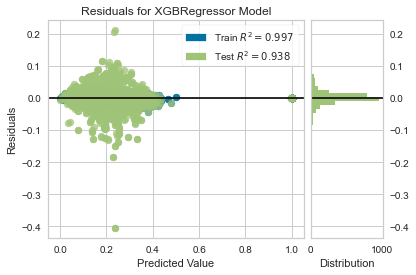

In [61]:
plot_model(tuned_XGBOOST)

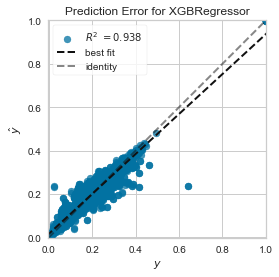

In [62]:
plot_model(tuned_XGBOOST, plot='error')

In [63]:
randomforest = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0263,0.0014,0.0380,0.8603,0.0318,0.2003
1,0.0263,0.0014,0.0379,0.9175,0.0313,0.2182
2,0.0236,0.0011,0.0335,0.8897,0.0274,0.1471
3,0.0237,0.0012,0.0344,0.9103,0.0284,0.1977
4,0.0255,0.0013,0.0357,0.9008,0.0292,0.1652
5,0.0247,0.0012,0.0348,0.9203,0.0289,0.1990
6,0.0245,0.0012,0.0344,0.9020,0.0284,0.1738
7,0.0248,0.0013,0.0360,0.9105,0.0296,0.1692
8,0.0249,0.0012,0.0348,0.8940,0.0285,0.1803


In [64]:
tuned_randomforest, tuner_rf = tune_model(randomforest, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0554,0.0045,0.0670,0.5660,0.0554,0.4137
1,0.0573,0.0049,0.0701,0.7177,0.0578,0.5382
2,0.0523,0.0043,0.0657,0.5765,0.0539,0.3916
3,0.0546,0.0045,0.0667,0.6626,0.0554,0.5232
4,0.0541,0.0045,0.0667,0.6534,0.0547,0.4012
5,0.0563,0.0048,0.0692,0.6837,0.0574,0.5140
6,0.0572,0.0048,0.0696,0.5983,0.0574,0.4624
7,0.0550,0.0046,0.0676,0.6849,0.0558,0.4370
8,0.0536,0.0045,0.0671,0.6059,0.0552,0.4273


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [65]:
print(tuner_rf)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [66]:
with open('tuner_random_forest_twitter.txt', 'w') as file:
    file.write(str(tuner_rf))

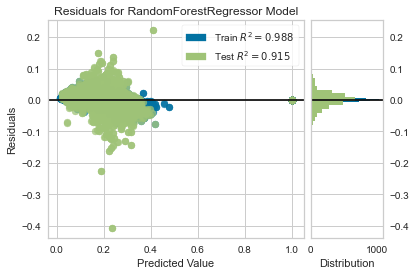

In [67]:
plot_model(tuned_randomforest)

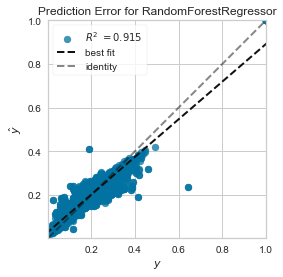

In [68]:
plot_model(tuned_randomforest, plot='error')

In [69]:
LightgradientBoost = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0295,0.0015,0.0389,0.8536,0.0325,0.2087
1,0.0287,0.0015,0.0386,0.9145,0.0316,0.2176
2,0.0265,0.0013,0.0354,0.8774,0.0290,0.1716
3,0.0278,0.0014,0.0374,0.8938,0.0309,0.2362
4,0.0286,0.0014,0.0377,0.8895,0.0309,0.1830
5,0.0277,0.0013,0.0362,0.9132,0.0301,0.2123
6,0.0271,0.0013,0.0354,0.8961,0.0292,0.1850
7,0.0271,0.0013,0.0360,0.9108,0.0297,0.1890
8,0.0277,0.0013,0.0364,0.8838,0.0299,0.1926


In [70]:
tuned_LightgradientBoost, tuner_lgbm = tune_model(LightgradientBoost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0489,0.0037,0.0606,0.6455,0.0500,0.3481
1,0.0501,0.0039,0.0623,0.7771,0.0511,0.4070
2,0.0465,0.0035,0.0590,0.6587,0.0483,0.3258
3,0.0479,0.0035,0.0595,0.7319,0.0492,0.4336
4,0.0473,0.0035,0.0591,0.7279,0.0484,0.3337
5,0.0491,0.0036,0.0603,0.7598,0.0500,0.4155
6,0.0495,0.0038,0.0620,0.6809,0.0509,0.3598
7,0.0474,0.0034,0.0581,0.7672,0.0477,0.3420
8,0.0487,0.0037,0.0606,0.6782,0.0498,0.3727


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [71]:
with open('tuner_light_gradient_boost_twitter.txt', 'w') as file:
    file.write(str(tuner_lgbm))

In [72]:
tuned_LightgradientBoost

LGBMRegressor(random_state=123)

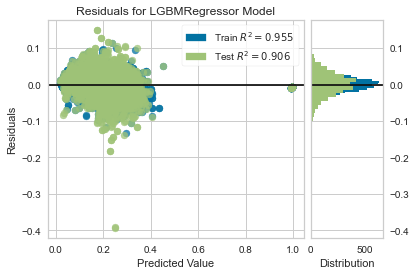

In [73]:
plot_model(tuned_LightgradientBoost)

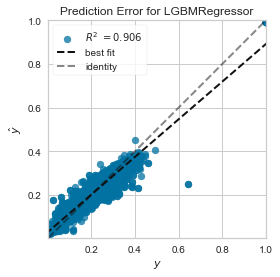

In [74]:
plot_model(tuned_LightgradientBoost, plot='error')

In [75]:
extratrees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0174,0.0012,0.0348,0.8831,0.0292,0.1467
1,0.0176,0.0012,0.0350,0.9298,0.0289,0.1808
2,0.0142,0.0009,0.0300,0.9117,0.0244,0.0831
3,0.0141,0.0009,0.0295,0.9338,0.0245,0.1454
4,0.0160,0.0010,0.0321,0.9199,0.0262,0.0997
5,0.0147,0.0009,0.0300,0.9405,0.0250,0.1295
6,0.0143,0.0009,0.0299,0.9257,0.0247,0.1138
7,0.0172,0.0011,0.0339,0.9209,0.0279,0.1173
8,0.0153,0.0010,0.0315,0.9130,0.0258,0.1072


In [76]:
tuned_extratrees, tuner_et = tune_model(extratrees, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0679,0.0078,0.0882,0.2479,0.0695,0.5415
1,0.0769,0.0126,0.1121,0.2781,0.0827,0.7348
2,0.0655,0.0077,0.0878,0.2447,0.0688,0.5591
3,0.0706,0.0096,0.0978,0.2752,0.0748,0.7215
4,0.0689,0.0092,0.0961,0.2804,0.0726,0.5365
5,0.0737,0.0111,0.1052,0.2699,0.0788,0.7115
6,0.0720,0.0090,0.0949,0.2533,0.0743,0.6531
7,0.0728,0.0103,0.1014,0.2907,0.0770,0.6178
8,0.0686,0.0084,0.0917,0.2643,0.0714,0.5665


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [77]:
with open('tuner_extra_trees_twitter.txt', 'w') as file:
    file.write(str(tuner_et))

In [78]:
tuned_extratrees

ExtraTreesRegressor(n_jobs=-1, random_state=123)

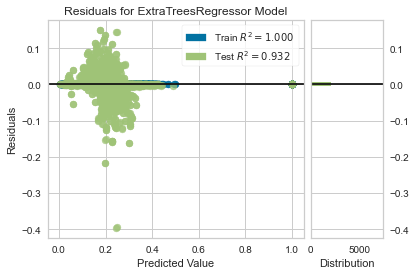

In [79]:
plot_model(tuned_extratrees)

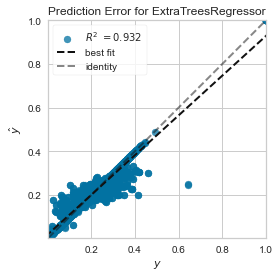

In [80]:
plot_model(tuned_extratrees, plot='error')

In [81]:
gradientboost = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0388,0.0024,0.0494,0.7640,0.0409,0.2708
1,0.0377,0.0024,0.0493,0.8603,0.0405,0.2965
2,0.0370,0.0023,0.0480,0.7744,0.0392,0.2404
3,0.0373,0.0024,0.0485,0.8218,0.0401,0.3172
4,0.0383,0.0024,0.0493,0.8107,0.0404,0.2565
5,0.0388,0.0024,0.0493,0.8395,0.0410,0.3018
6,0.0376,0.0023,0.0483,0.8062,0.0398,0.2612
7,0.0364,0.0021,0.0462,0.8527,0.0381,0.2533
8,0.0375,0.0023,0.0479,0.7993,0.0392,0.2662


In [82]:
tuned_gradientboost, tuner_gbr = tune_model(gradientboost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0265,0.0017,0.0418,0.8313,0.0340,0.1868
1,0.0241,0.0013,0.0358,0.9263,0.0298,0.2145
2,0.0231,0.0013,0.0363,0.8709,0.0298,0.1349
3,0.0224,0.0012,0.0342,0.9112,0.0281,0.1855
4,0.0231,0.0012,0.0342,0.9090,0.0280,0.1332
5,0.0239,0.0013,0.0365,0.9119,0.0301,0.1625
6,0.0229,0.0011,0.0339,0.9046,0.0280,0.1457
7,0.0239,0.0013,0.0356,0.9128,0.0293,0.1582
8,0.0232,0.0013,0.0354,0.8902,0.0285,0.1503


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [83]:
with open('tuner_gradient_boost_twitter.txt', 'w') as file:
    file.write(str(tuner_gbr))

In [84]:
tuned_gradientboost

GradientBoostingRegressor(learning_rate=0.3, max_depth=5, max_features=1.0,
                          min_impurity_decrease=0.0005, min_samples_leaf=3,
                          min_samples_split=7, n_estimators=160,
                          random_state=123, subsample=0.45)

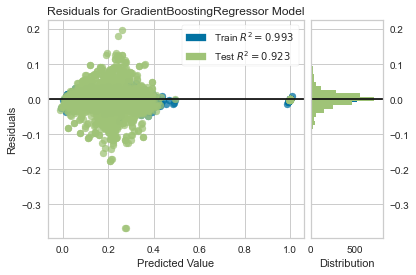

In [85]:
plot_model(tuned_gradientboost)

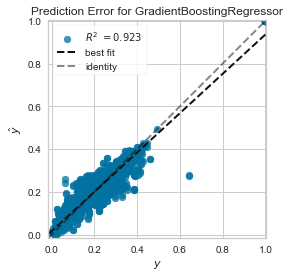

In [86]:
plot_model(tuned_gradientboost, plot='error')